In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-23-players-dataset/Fifa 23 Players Data.csv


# Introduction

In this notebook, we use FIFA23 player stats data to predict who will win the FIFA World Cup Qatar 2022. First, we predict the top two nations from each group. Then, we predict the tournament.

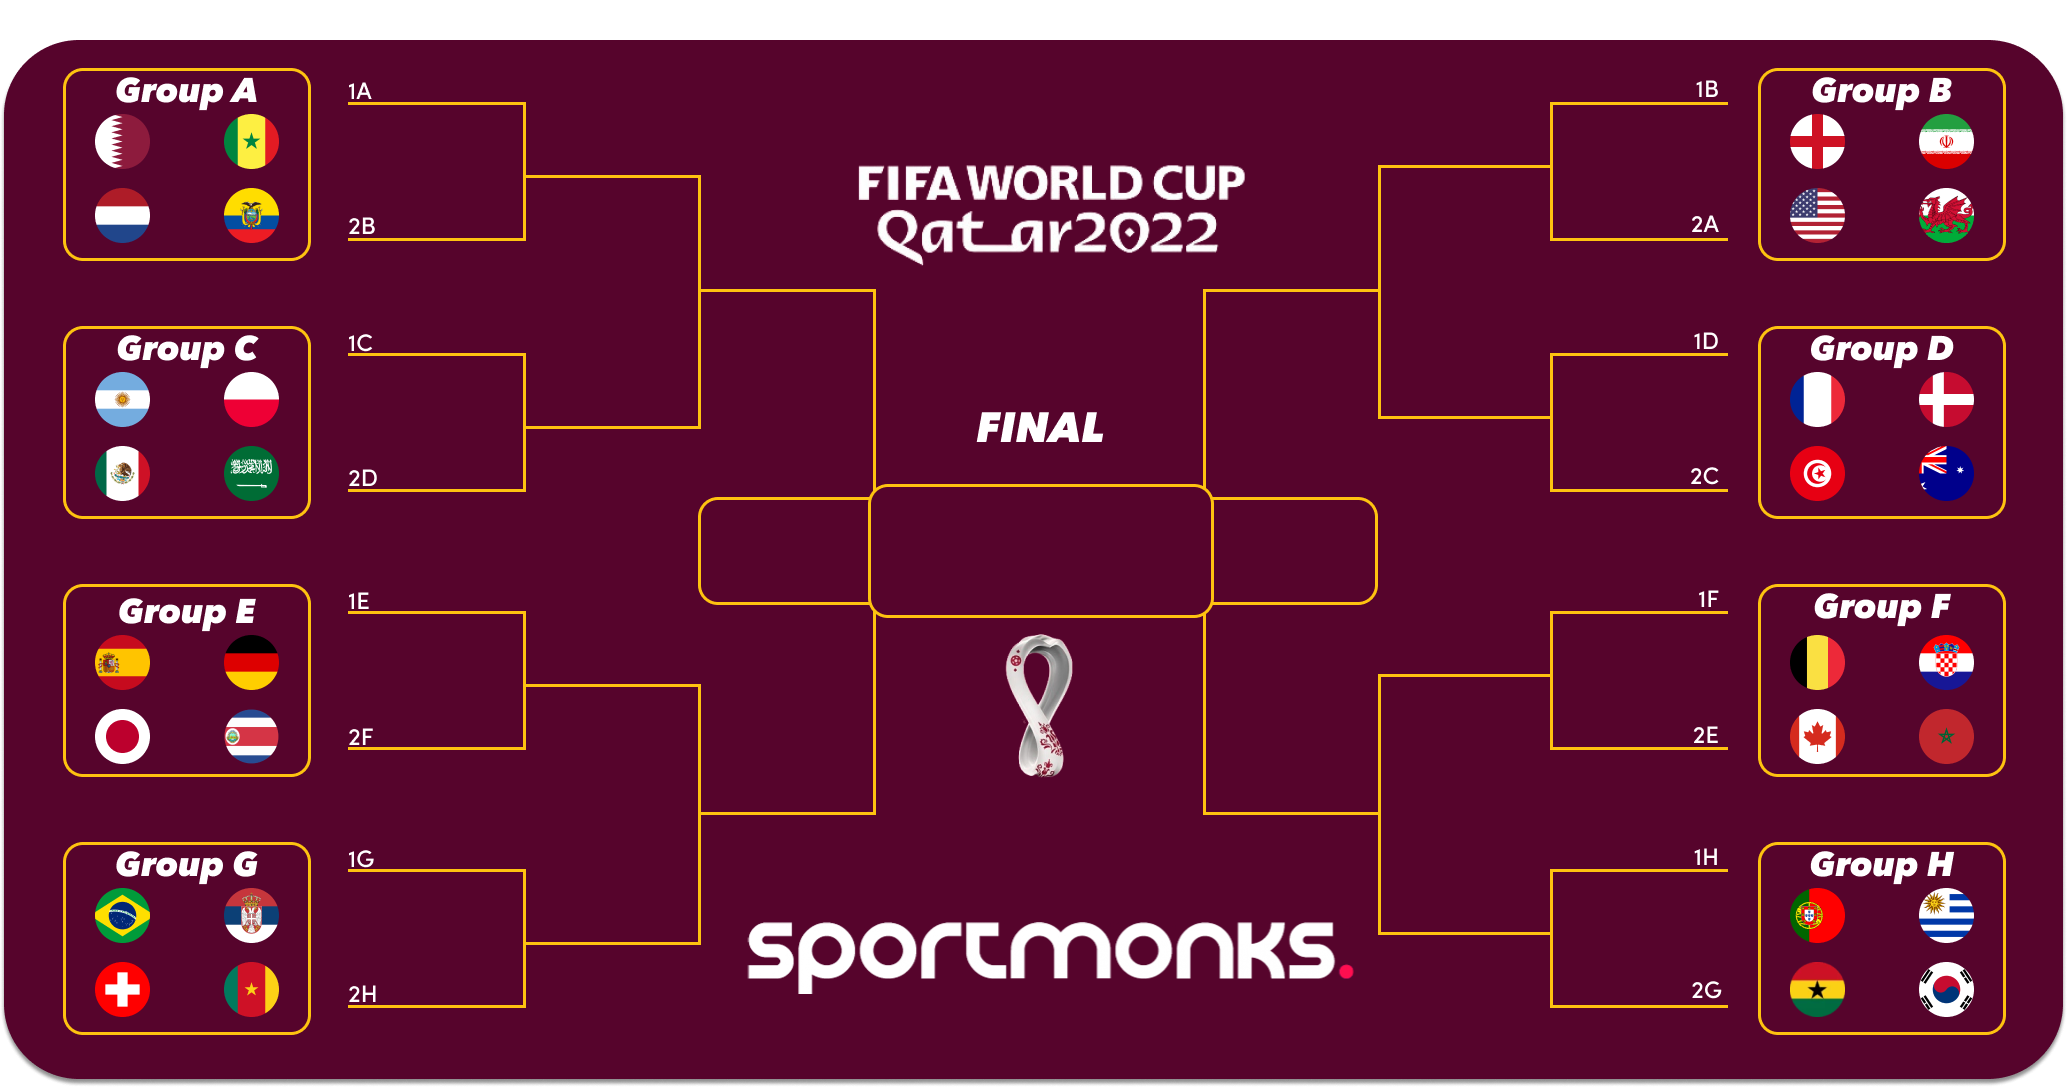

In [5]:
from IPython.display import Image 
Image(filename='/kaggle/input/tournament-tree/Tournament-Tree-3.png')

# Load and Inspect Data

In [51]:
df = pd.read_csv('/kaggle/input/fifa-23-players-dataset/Fifa 23 Players Data.csv', low_memory=False)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [53]:
df.isna().sum()

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64

In [54]:
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


# Data Preprocessing
- Choose useful colums

In [60]:
useful_columns = ['Known As', 'Overall', 'Positions Played', 'Nationality']
df = df[useful_columns]

In [61]:
df

,Known As,Overall,Positions Played,Nationality
0,L. Messi,91,RW,Argentina
1,K. Benzema,91,"CF,ST",France
2,R. Lewandowski,91,ST,Poland
3,K. De Bruyne,91,"CM,CAM",Belgium
4,K. Mbappé,91,"ST,LW",France
...,...,...,...,...
18534,D. Collins,47,"ST,RM",Republic of Ireland
18535,Yang Dejiang,47,CDM,China PR
18536,L. Mullan,47,CM,Northern Ireland
18537,D. McCallion,47,CB,Republic of Ireland


In [62]:
df.isna().sum()

Known As            0
Overall             0
Positions Played    0
Nationality         0
dtype: int64

# Exploratory Data Analysis
### Do we have all the nations?

In [63]:
df.Nationality.unique()

array(['Argentina', 'France', 'Poland', 'Belgium', 'Egypt', 'Germany',
       'Portugal', 'Netherlands', 'England', 'Brazil', 'Korea Republic',
       'Slovenia', 'Senegal', 'Norway', 'Italy', 'Costa Rica', 'Croatia',
       'Spain', 'Scotland', 'Austria', 'Algeria', 'Slovakia', 'Serbia',
       'Gabon', 'Czech Republic', 'Hungary', 'Switzerland', 'Uruguay',
       'Ghana', 'Morocco', 'Turkey', 'Montenegro', 'Cameroon',
       'Bosnia and Herzegovina', 'Colombia', 'Canada', "Côte d'Ivoire",
       'Nigeria', 'Denmark', 'Finland', 'Mexico', 'Ukraine',
       'United States', 'Sweden', 'Central African Republic', 'Mali',
       'Iran', 'Burkina Faso', 'Armenia', 'Wales', 'Greece', 'Guinea',
       'Japan', 'Jamaica', 'Kosovo', 'Chile', 'Ecuador', 'Libya',
       'Russia', 'Tunisia', 'Northern Ireland', 'Mozambique', 'Peru',
       'Togo', 'Romania', 'Congo DR', 'Angola', 'Albania', 'Georgia',
       'Zimbabwe', 'North Macedonia', 'Venezuela', 'Australia',
       'Paraguay', 'Republic of 

In [64]:
group_a = ['Qatar', 'Senegal', 'Netherlands', 'Ecuador']
group_b = ['England', 'Iran', 'United States', 'Wales']
group_c = ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland']
group_d = ['France', 'Australia', 'Denmark', 'Tunisia']
group_e = ['Spain', 'Costa Rica', 'Germany', 'Japan']
group_f = ['Belgium', 'Canada', 'Morocco', 'Croatia']
group_g = ['Brazil', 'Serbia', 'Switzerland', 'Cameroon']
group_h = ['Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

groups = [group_a, group_b, group_c, group_d, group_e, group_f, group_g, group_h]

In [65]:
def check_nations():
    fifa_nations = df.Nationality.unique()
    for group in groups:
        for nation in group:
            if nation not in fifa_nations:
                print(nation)
                return False
            
    return True

In [66]:
check_nations()

True

In [71]:
def get_starting_11(nationality, positions):
    df_nation = df[df.Nationality == nationality].copy()
    result = []
    for pos in positions:
        idx = df_nation[ df_nation['Positions Played'].str.contains(pos)]['Overall'].idxmax()
        result.append(df_nation.loc[idx])
        df_nation.drop(idx, inplace=True)
    return pd.concat(result,axis=1).transpose()

In [72]:
formation_343 = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
formation_433 = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
formation_442 = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
formations = [formation_343, formation_433, formation_442]

In [73]:
get_starting_11('Qatar', formation_343)

,Known As,Overall,Positions Played,Nationality
6227,S. Al Sheeb,68,GK,Qatar
4176,B. Khoukhi,71,"CB,CDM",Qatar
4810,A. Hassan,70,"LWB,CB",Qatar
5537,Pedro Miguel,69,"RWB,CB",Qatar
8254,I. Mohammad,67,"RWB,RW",Qatar
3505,K. Boudiaf,72,"CM,CDM",Qatar
4160,A. Hatem,71,"CM,CDM",Qatar
7036,H. Ahmed,68,LWB,Qatar
3248,H. Al Haydos,72,"RW,CAM,LW",Qatar
1086,A. Afif,76,"LW,CF,CAM",Qatar


In [74]:
def check_starting_11():
    for group in groups:
        for nation in group:
            for formation in formations:
                try:
                    starting_11 = get_starting_11(nation, formation)
                except Exception as err:
                    print(f"Unexpected {err}, {type(err)} with {nation}")

In [75]:
check_starting_11()

Unexpected attempt to get argmax of an empty sequence, <class 'ValueError'> with Qatar
Unexpected attempt to get argmax of an empty sequence, <class 'ValueError'> with Iran
Unexpected attempt to get argmax of an empty sequence, <class 'ValueError'> with Costa Rica


For the formation-nation pair that could not be made into a starting 11, we will skip that formation.

### Visualize Overall

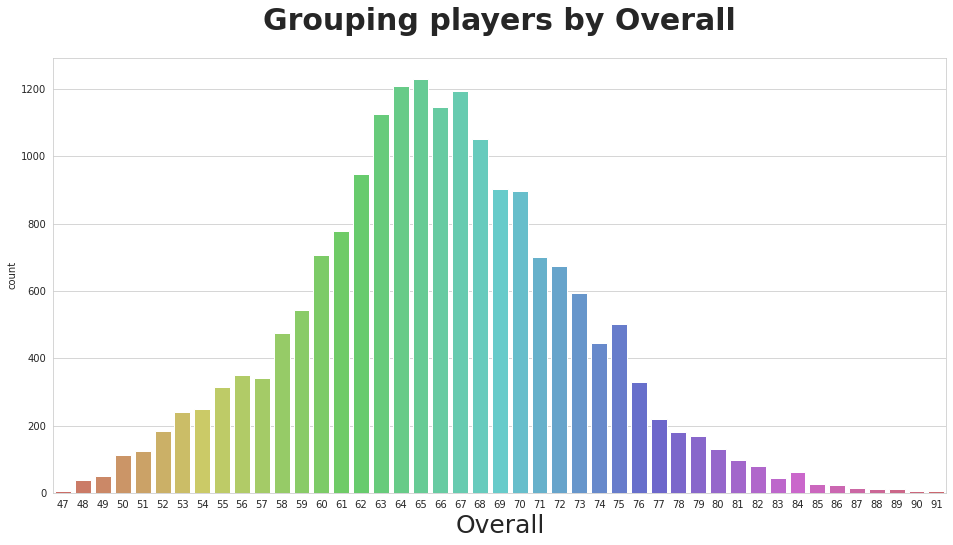

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
sns.countplot(x="Overall", data=df, palette="hls");
plt.show()

# Group Stage

In [118]:
def get_squad_power(nation: str, formations: List['str']) -> float:
    """Computes nation's squad average overall (power) for given formations
    """
    nation_power = 0
    valid_cnt = 0
    for formation in formations:
        try:
            starting_11 = get_starting_11(nation, formation)
        except:
            continue
        nation_power += starting_11['Overall'].mean()
        valid_cnt += 1
    return nation_power

In [119]:
from typing import List

def get_group_top_2(group: List[str]) -> List[str]:
    """Given a group of nations, return top two nations
    """
    nation_powers = {}
    for nation in group:
        nation_powers[nation] = get_squad_power(nation, formations)
    
    ranking = [k for k, v in sorted(nation_powers.items(), key=lambda item: item[1], reverse=True)]

    return ranking[:2]

In [120]:
get_group_top_2(group_a)

['Netherlands', 'Senegal']

In [121]:
def get_group_stage_result(groups: List[List[str]]) -> List[List[str]]:
    """Given groups, return their top two teams
    """
    res = []
    for group in groups:
        res.append(get_group_top_2(group))
    return res

In [122]:
get_group_stage_result(groups)

[['Netherlands', 'Senegal'],
 ['England', 'United States'],
 ['Argentina', 'Poland'],
 ['France', 'Denmark'],
 ['Germany', 'Spain'],
 ['Belgium', 'Croatia'],
 ['Brazil', 'Serbia'],
 ['Portugal', 'Uruguay']]

# Tournament

In [140]:
def get_match_result(nation_1: str, nation_2: str) -> str:
    """Given two nations, returns a winner
    """
    nation_1_power = get_squad_power(nation_1, formations)
    nation_2_power = get_squad_power(nation_1, formations)
    
    return nation_1 if nation_1_power >= nation_2_power else nation_2

In [126]:
get_match_result('Netherlands', 'United States')

'Netherlands'

In [141]:
def get_tournament_16_result(group_stage_result: List[str]) -> List[str]:
    """Given group stage result, returns 8 winners of the tournament 16
    """
    res = []
    for i in range(4):
        res.append(get_match_result(group_stage_result[i*2][0], group_stage_result[i*2+1][1]))
        res.append(get_match_result(group_stage_result[i*2+1][1], group_stage_result[i*2][0]))
    
    return res

In [144]:
group_stage_result = get_group_stage_result(groups)
get_tournament_16_result(group_stage_result)

['Netherlands',
 'United States',
 'Argentina',
 'Denmark',
 'Germany',
 'Croatia',
 'Brazil',
 'Uruguay']

In [147]:
def get_tournament_8_result(tournament_16_result: List[str]) -> List[str]:
    """Given tournament 16 result, returns 4 winners of the tourament 8
    """
    res = []
    for i in range(2):
        res.append(get_match_result(tournament_16_result[i*4],tournament_16_result[i*4+2]))
        res.append(get_match_result(tournament_16_result[i*4+1],tournament_16_result[i*4+3]))
        
    return res

In [148]:
tournament_16_result = get_tournament_16_result(group_stage_result)
get_tournament_8_result(tournament_16_result)

['Netherlands', 'United States', 'Germany', 'Croatia']

In [152]:
def get_semi_final_and_final_result(tournament_8_result: List[str]) -> str:
    """Given tournament 8 result, returns the winner of the world cup
    """
    semi_res = []
    semi_res.append(get_match_result(tournament_8_result[0], tournament_8_result[2]))
    semi_res.append(get_match_result(tournament_8_result[1], tournament_8_result[3]))
    
    return get_match_result(semi_res[0], semi_res[1])

In [153]:
tournament_8_result = get_tournament_8_result(tournament_16_result)
get_semi_final_and_final_result(tournament_8_result)

'Netherlands'

# Conclusion

According to my analysis, Netherlands is the winner of the FIFA World Cup Qatar 2022. What is your prediction?